 ## Project - 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
print(housing.shape)

(506, 14)


In [4]:
housing.describe()


,CRMM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285929,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702710,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRMM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

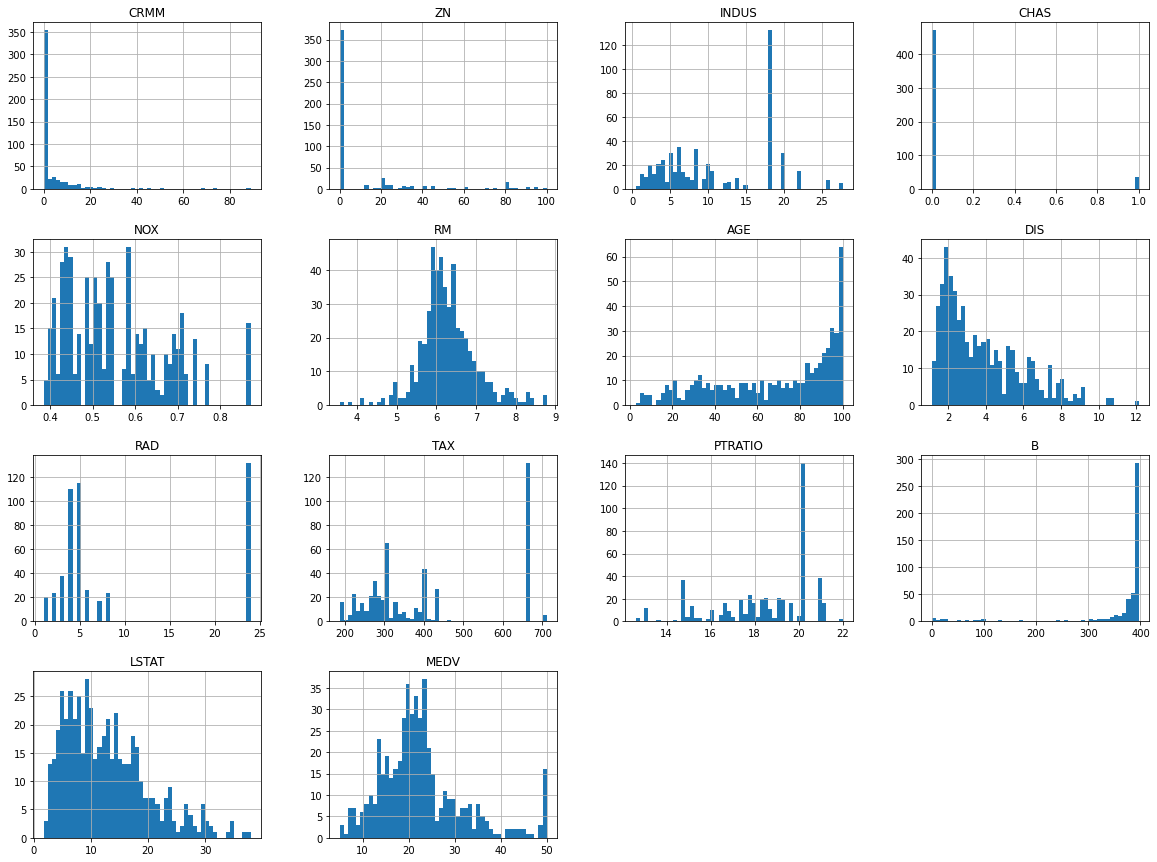

In [6]:
housing.hist(bins=50, figsize=(20, 15))

## Train-test spiliting

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")

rows in train set : 404
Rows in test set : 102


In our 'DATASET' there is a feature 'CHAS' where  no. of '0' values are 376 and '1' are 28 so for equal spliting of 'CHAS' we are using 'StratifiedShuffleSplit'

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
   strat_train_set = housing.loc[train_index]
   strat_test_set = housing.loc[test_index]



In [9]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [10]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [11]:
print(f"From train set : {376/28}\nFrom test set : {95/7}") 

From train set : 13.428571428571429
From test set : 13.571428571428571


In [12]:
housing = strat_train_set.copy()

LOOKING FOR CORRELATION'S

In [13]:
# correlations can help us examine data , watchout for outliers , for socanning and for relations btwn other features

In [14]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
# 1 is strong positive correlation
# rm is strongly positive which is rooms per dwelling which means it is directly propotional with MEDV(price)

MEDV       1.000000
RM         0.679491
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRMM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [15]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

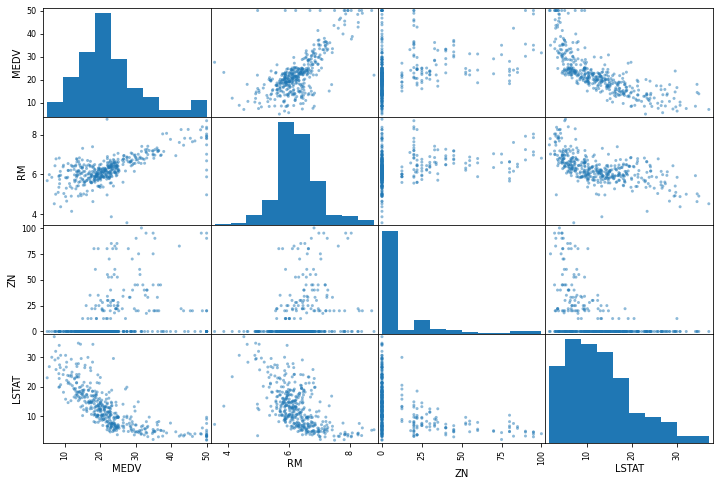

In [16]:
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<!-- BY scanning all the graphs we can clearly see that RM and MEDV is showing very good result and with that LSTAT and MEDV is also showing very good result , lets analyse the RM and MEDV more for clear vision -->

<AxesSubplot:xlabel='RM', ylabel='TAX'>

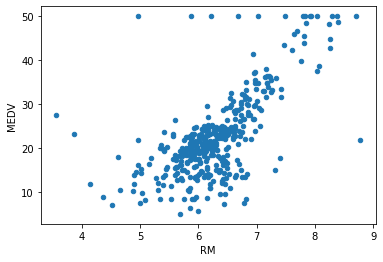

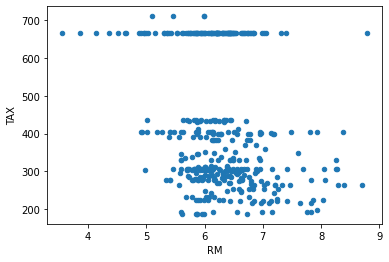

In [17]:
housing.plot(kind ="scatter", x = "RM", y = "MEDV")
housing.plot(kind ="scatter", x = "RM", y = "TAX")

 <!-- after analysing the RM - MEDV we can observe some outliers(at 50) in our data sets so make our model more accurate we can remove those outliers from dataset so the model give more accurate calcluations... -->  

Trying few attribute combinations for better understanig of data

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

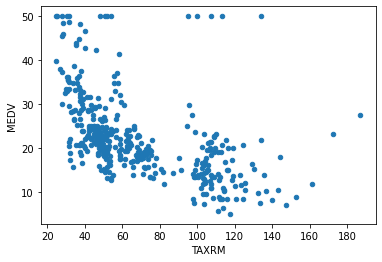

In [18]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV")


In [19]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()
housing.describe()
# housing_labels


,CRMM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281519,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713134,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


creating a automated pipeline for future datasets were values are missing (In our case in 'RM' there is one value missing)

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_.shape



(13,)

In [22]:
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns = housing.columns)

In [23]:
housing_tr.describe()

,CRMM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281344,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712257,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## creating pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
my_pipeline = Pipeline([
   ('imputer', SimpleImputer(strategy='median')),
   ('std_scaler',StandardScaler()),
])

In [26]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [27]:
housing_num_tr.shape

(404, 13)

 **MODEL SELECTION**
 
 **1> using DecisionTreeRegressor**
         mean is :  4.443497424620567
         standard deviation is :  1.1545169101953312

**2> using LinearRegression**
         mean is :  5.022574596909429
         standard deviation is :  1.0620848766596915

**3> using RandomForestRegressor**
         mean is :  3.3228786303247304
         standard deviation is :  0.605580098745905
         
         
So after looking at results we are using **'RandomForestRegressor'** as our model for this project


In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [76]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)


array([22.381, 25.496, 16.377, 23.395, 23.539])

In [75]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating model

In [56]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print(f"mse is : {rmse}")

mse is : 1.2314668776674735


## cross valuation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv=10)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse_scores = np.sqrt(-scores)

In [58]:
def print_scores(scores):
   print("scores is : ",scores)
   print("mean is : ", scores.mean())
   print("standard deviation is : ", scores.std())

In [59]:
print_scores(rmse_scores)

scores is :  [2.77359186 2.68791608 4.46373331 2.79446366 3.51873402 2.63726325
 4.86093757 3.3586626  3.0713629  3.48492203]
mean is :  3.365158727621721
standard deviation is :  0.7233699559811944


## saving the model

In [60]:
from joblib import dump, load
dump(model, "finalmodel.joblib")

['finalmodel.joblib']

## testing the model 

In [61]:
X_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [62]:
def test_result(final_mse,final_rmse,final_predictions):
   print(f"final mse is : {final_mse} \n")
   print(f"final rmse is : {final_rmse} \n")
   print(f"final predictions is : {final_predictions}\n {list(y_test)}")

In [63]:
test_result(final_mse,final_rmse,final_predictions)

final mse is : 8.462224725490191 

final rmse is : 2.908990327500281 

final predictions is : [24.471 11.539 26.02  21.991 19.039 14.779 20.074 14.256 31.725 41.325
 19.745 11.512 24.216 27.385 19.617 11.171 31.072 14.351 23.451 18.393
 19.826 17.894 17.529 22.462 18.446 31.475 16.28  33.047  8.423 33.546
 23.835 21.398 22.983 10.852 21.08  11.263 42.784 23.873 23.374 42.427
 24.181 30.025 20.594 20.512 19.365 33.162 44.944 20.153 20.509 21.716
 21.185 14.632 21.263 15.167 24.953 33.291 42.342 29.214 19.372 20.669
 47.452 10.438 19.333 24.859 14.904 33.433 20.082 18.058 19.25  34.855
 26.591 22.904 21.633 22.549 34.474 13.044 15.851 20.394 20.503 21.294
 22.652 20.945 13.711 23.214 20.866 21.064 14.244 21.204 21.811 22.985
 18.498 27.013  7.207 26.638 18.255 29.172 20.051 31.096 14.817 26.855
 21.452 20.375]
 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6,